In [22]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns



In [34]:
master = pd.read_csv("../data/trainFINAL.csv")
master = master.drop('ENDOWMENT03', axis=1)

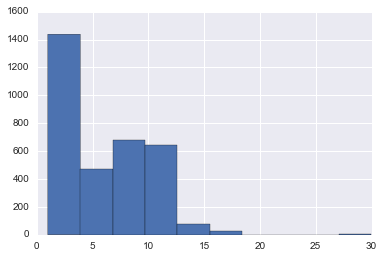

In [35]:
nans = pd.isnull(master)
nans_copy = pd.isnull(master)

from collections import Counter

university_nans = Counter()
column_count_nans = Counter()

for index, row in zip(nans_copy.index, nans_copy.values):
    row_data = dict(zip(nans_copy.columns.values, row))
    for column, value in row_data.items():
        if value:
            university_nans[index] += 1
            column_count_nans[column] += 1
            
# A good number of our institutions have between 0 and 10 NaN values.
university_nan_dist = pd.DataFrame.from_dict(university_nans, orient='index').reset_index()
university_nan_dist = university_nan_dist.rename(columns={'index':'event', 0:'count'})
plt.hist(university_nan_dist['count'])

# Feature to NaN DataFrame
column_nan_dist = pd.DataFrame.from_dict(column_count_nans, orient='index').reset_index()
column_nan_dist = column_nan_dist.rename(columns={'index':'event', 0:'count'})
column_nan_dist['count'] = column_nan_dist['count'].astype(int)

In [36]:
import statsmodels.stats.api as sms

conf_interval = {feature: 0 for feature in column_nan_dist['event']}

pprint(conf_interval.keys())

for feature in conf_interval.keys():
    valid, invalid = master[master[feature].notnull()], master[master[feature].isnull()]
    valid, invalid = valid['DRate'], invalid['DRate']
    
    cm = sms.CompareMeans(sms.DescrStatsW(invalid), sms.DescrStatsW(valid))
    conf_interval[feature] = cm.tconfint_diff(usevar='unequal')
    
pprint(conf_interval)

dict_keys(['PT_FACULTY_PER_100FTE', 'GRANT02', 'FED_GRANT_PCT', 'TOTAL_FULL_TIME', 'INSTITUTIONAL_GRANT_AID_SHARE', 'RESTRICTED_REVENUE', 'FT_FIRST_TIME_FIRST_YR_DEG_SEEK', 'TOTAL_ENROLLMENT_WHITE_TOT', 'NET_STUDENT_TUITION', 'STICKER_PRICE_SHARE', 'TUITION_DISCOUNT', 'INST_GRANT_PCT', 'NETTUITION01', 'TOTAL_ENROLLMENT_ASIAN_TOT', 'TOTAL_ENROLLMENT_BLACK_TOT', 'PRIV_INVEST_ENDOW', 'CERTIFICATES_AWARDS_100FTE', 'TOTALDEGREES_100FTE', 'LOAN_PCT', 'TOTALCOMPLETIONS_100FTE', 'TUITIONFEE02_TF', 'NETTUITION_SHARE', 'LOAN_AVG_AMOUNT', 'INST_GRANT_AVG_AMOUNT', 'ACADSUPP01', 'TOTAL_ENROLLMENT_HISP_TOT', 'SALARYTOTAL', 'GRANT01', 'GRANT07', 'STUDSERV01', 'FT_FACULTY_PER_100FTE', 'TOTAL03_REVENUE'])
{'ACADSUPP01': (4.2073726781828764, 5.2744692402709941),
 'CERTIFICATES_AWARDS_100FTE': (-5.4394269049486859, -4.3706866095833803),
 'FED_GRANT_PCT': (-9.118177489037528, -7.7975494835965193),
 'FT_FACULTY_PER_100FTE': (0.089825329286457589, 1.1157958877836527),
 'FT_FIRST_TIME_FIRST_YR_DEG_SEEK': (-8

In [62]:
imputable = """
GRANT02
INST_GRANT_AVG_AMOUNT
STUDSERV01
TOTAL03_REVENUE
TOTALCOMPLETIONS_100FTE
TOTAL_ENROLLMENT_ASIAN_TOT
TOTAL_ENROLLMENT_BLACK_TOT
TOTAL_ENROLLMENT_HISP_TOT
TOTAL_ENROLLMENT_WHITE_TOT
""".split()


'''
 'NETTUITION01': (-8.8718579919394465, 5.4473438890714716),
 'NETTUITION_SHARE': (-9.3042697015481757, 2.6855786889799971),
 'NET_STUDENT_TUITION': (-8.8718579919394465, 5.4473438890714716),
 'STICKER_PRICE_SHARE': (-9.3042697015481757, 2.6855786889799971),
 'STUDSERV01': (-0.027744328816125874, 2.3375088941335838),
 'TOTAL03_REVENUE': (-121.29496013022492, 136.45910214205924),
 'TOTALCOMPLETIONS_100FTE': (-6.2545762400744493, 8.572119797086696),
 'TOTAL_ENROLLMENT_ASIAN_TOT': (-7.7168545486939726, 6.7114431187674901),
 'TOTAL_ENROLLMENT_BLACK_TOT': (-7.7168545486939726, 6.7114431187674901),
 'TOTAL_ENROLLMENT_HISP_TOT': (-7.7168545486939726, 6.7114431187674901),
 'TOTAL_ENROLLMENT_WHITE_TOT': (-7.7168545486939726, 6.7114431187674901),
 'TOTAL_FULL_TIME': (-4.3605897807137453, 3.1124827259137753),

'''


cannot_impute = [feature for feature in conf_interval.keys() if feature not in imputable]
print(len(imputable), len(cannot_impute))



9 23


In [57]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# for feature, confidence in conf_interval.items():
#     plt.scatter(conf_interval[feature][0], conf_interval[feature][1])

# ax.axis([-30, 30, -30, 30])
# plt.show()